# 决策树学习
决策树是一种常用的监督学习算法，适用于分类和回归任务。

In [78]:
# 导入必要的库
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 加载数据集
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# 创建并训练决策树模型
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 测试模型
accuracy = clf.score(X_test, y_test)
print(f'模型准确率: {accuracy:.2f}')

模型准确率: 1.00


## 信息熵、信息增益率和基尼系数
在决策树中，信息熵用于衡量数据的不确定性，信息增益率用于选择最优划分属性，基尼系数用于评估数据集的纯度。

## 信息熵、信息增益率和基尼系数的定义和公式
### 信息熵 (Entropy)
信息熵是衡量数据集不确定性的一种指标，其公式为：
$$ Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i) $$
其中，$p_i$ 是类别 $i$ 的概率。

### 信息增益率 (Information Gain Ratio)
信息增益率用于衡量某一特征对数据集划分的有效性，其公式为：
$$ GainRatio = \frac{Gain}{IV} $$
其中，$Gain$ 是信息增益，$IV$ 是固有值 (Intrinsic Value)。

### 基尼系数 (Gini Index)
基尼系数用于衡量数据集的纯度，其公式为：
$$ Gini = 1 - \sum_{i=1}^{n} p_i^2 $$
其中，$p_i$ 是类别 $i$ 的概率。

In [79]:
# 计算信息熵
#当数据量一定时，系统越有序，熵值越低，系统越混乱，熵值越高
from math import log2

def entropy(labels):
    total = len(labels)
    counts = {label: labels.count(label) for label in set(labels)}
    return -sum((count / total) * log2(count / total) for count in counts.values())

# 示例数据
labels = [0, 0, 1, 1, 1, 0, 1]
print(f'信息熵: {entropy(labels):.4f}')

信息熵: 0.9852


In [80]:
# 计算基尼系数
def gini(labels):
    total = len(labels)
    counts = {label: labels.count(label) for label in set(labels)}
    return 1 - sum((count / total) ** 2 for count in counts.values())

# 示例数据
print(f'基尼系数: {gini(labels):.4f}')

基尼系数: 0.4898


In [81]:
# 计算信息增益率
def information_gain_ratio(parent_entropy, subsets):
    total = sum(len(subset) for subset in subsets)
    weighted_entropy = sum((len(subset) / total) * entropy(subset) for subset in subsets)
    intrinsic_value = -sum((len(subset) / total) * log2(len(subset) / total) for subset in subsets if len(subset) > 0)
    gain = parent_entropy - weighted_entropy
    return gain / intrinsic_value if intrinsic_value != 0 else 0

# 示例数据
subset1 = [0, 0, 1]
subset2 = [1, 1, 0, 1]
parent_entropy = entropy(labels)
gain_ratio = information_gain_ratio(parent_entropy, [subset1, subset2])
print(f'信息增益率: {gain_ratio:.4f}')

信息增益率: 0.1300


## 信息增益率的定义和公式
信息增益率是衡量某一特征对数据集划分效果的一种指标，其公式为：
$$ GainRatio = \frac{Gain}{IV} $$
其中：
- $Gain$ 是信息增益。
- $IV$ 是固有值 (Intrinsic Value)，其公式为：
$$ IV = -\sum_{i=1}^{k} \frac{|D_i|}{|D|} \log_2 \frac{|D_i|}{|D|} $$

信息增益率越大，说明该特征对数据集的划分效果越好。

## 信息增益率相较于信息增益的优势
信息增益虽然能够衡量特征对数据集划分的效果，但它存在偏向于取值较多的特征的问题。

信息增益率通过引入固有值 (Intrinsic Value, IV) 对信息增益进行归一化，克服了这一偏向性。

### 优势：
1. **减少偏向性**：信息增益率能够避免信息增益偏向于取值较多的特征。
2. **更公平的特征选择**：通过归一化，信息增益率能够更公平地衡量不同特征的划分效果。

***因此，在特征取值较多的情况下，信息增益率通常比信息增益更适合作为特征选择的指标。***

## 篮球比赛熵值计算
假设有4个球队 {A, B, C, D}，它们的获胜概率分别为 {1/2, 1/4, 1/8, 1/8}，计算其熵值。

In [82]:
# 计算熵值
probabilities = [1/2, 1/4, 1/8, 1/8]
entropy_value = -sum(p * log2(p) for p in probabilities)
print(f'篮球比赛的熵值 Ent(D): {entropy_value:.4f}')

篮球比赛的熵值 Ent(D): 1.7500


## 信息增益
信息增益是衡量某一特征对数据集划分效果的一种指标。信息增益的公式为：
$$ Gain = Ent(D) - \sum_{i=1}^{k} \frac{|D_i|}{|D|} Ent(D_i) $$
其中：
- $Entropy(D)$ 是数据集 $D$ 的信息熵。
- $D_i$ 是按照某一特征划分后的第 $i$ 个子集。
- $|D_i|$ 是子集 $D_i$ 的大小，$|D|$ 是数据集 $D$ 的大小。

***信息增益越大，说明该特征对数据集的划分效果越好。***

In [83]:
# 计算信息增益
def information_gain(parent_entropy, subsets):
    total = sum(len(subset) for subset in subsets)
    weighted_entropy = sum((len(subset) / total) * entropy(subset) for subset in subsets)
    gain = parent_entropy - weighted_entropy
    return gain

# 示例数据
parent_labels = [0, 0, 1, 1, 1, 0, 1]
subset1 = [0, 0, 1]
subset2 = [1, 1, 0, 1]

parent_entropy = entropy(parent_labels)
gain = information_gain(parent_entropy, [subset1, subset2])
print(f'信息增益: {gain:.4f}')

信息增益: 0.1281


## CART 剪枝
CART (Classification and Regression Tree) 剪枝是决策树算法中用于防止过拟合的重要步骤。

### 剪枝的两种方法：
1. **预剪枝 (Pre-pruning)**：
   - 在构建决策树的过程中提前停止树的生长。
   - 通过设置条件（如最大深度、最小样本数等）来限制树的复杂度。

2. **后剪枝 (Post-pruning)**：
   - 先生成一棵完整的决策树，然后通过剪枝来简化树。
   - 剪枝的依据通常是通过交叉验证来评估子树的性能。

### 剪枝的优点：
- 减少模型复杂度，提升泛化能力。
- 防止过拟合，提高模型在测试集上的表现。

***CART 剪枝在实际应用中非常重要，能够有效平衡模型的复杂度和性能。***

In [84]:
from sklearn.feature_extraction  import DictVectorizer#字典特征提取

## dict_demo 函数功能解释
该函数演示了如何使用 `sklearn.feature_extraction` 中的 `DictVectorizer` 类将字典列表转换为数值特征矩阵。

### 功能步骤：
1. **输入数据**：函数以一个字典列表作为输入，每个字典包含两个键：`city`（表示城市名称，类别特征）和 `temperature`（表示温度，数值特征）。

2. **初始化 DictVectorizer**：通过 `DictVectorizer(sparse=False)` 初始化特征提取器，设置 `sparse=False` 以返回密集矩阵。

3. **特征转换**：调用 `fit_transform` 方法将输入数据转换为数值特征矩阵：
   - 类别特征（`city`）通过独热编码（One-Hot Encoding）转换为多个二进制列。
   - 数值特征（`temperature`）保持不变。

4. **输出结果**：
   - 打印转换后的数值特征矩阵。
   - 打印特征名称列表（通过 `get_feature_names_out` 方法获取）。

### 应用场景：
该函数展示了如何将混合类型的特征（类别和数值）转换为统一的数值格式，以便用于机器学习模型的训练。

## 密集矩阵解释
在 `dict_demo` 函数中，`DictVectorizer` 的 `sparse=False` 参数指定返回密集矩阵。

### 什么是密集矩阵？
密集矩阵是一种矩阵表示形式，其中所有的元素（包括零值）都显式存储。这种表示方式适用于非稀疏数据，即矩阵中大部分元素为非零值的情况。

### 示例：
在 `dict_demo` 函数中，输入数据为：
```python
[
    {'city': '北京', 'temperature': 10},
    {'city': '上海', 'temperature': 20},
    {'city': '深圳', 'temperature': 30}
]
```
通过 `DictVectorizer` 转换后，生成的密集矩阵如下：
```
[
 [ 1.  0.  0. 10.],
 [ 0.  1.  0. 20.],
 [ 0.  0.  1. 30.]
]
```
其中：
- 前三列为 `city` 特征的独热编码（One-Hot Encoding）。
- 最后一列为 `temperature` 特征的数值。

### 密集矩阵的优点：
1. **简单直观**：所有数据显式存储，便于理解和操作。
2. **适用于非稀疏数据**：当矩阵中非零值较多时，密集矩阵的存储和计算效率较高。

### 注意事项：
对于稀疏数据（大部分元素为零），密集矩阵可能会浪费存储空间，此时应使用稀疏矩阵表示。

In [85]:
def dict_demo():
    data = [
        {'city': '北京', 'temperature': 10},
        {'city': '上海', 'temperature': 20},
        {'city': '深圳', 'temperature': 30}
    ]
    transfer = DictVectorizer(sparse=False)
    data = transfer.fit_transform(data)
    print("返回的结果\n",data)
    print("特征的名字\n",transfer.get_feature_names_out(data))
    return None

In [86]:
dict_demo()

返回的结果
 [[ 0.  1.  0. 10.]
 [ 1.  0.  0. 20.]
 [ 0.  0.  1. 30.]]
特征的名字
 ['city=上海' 'city=北京' 'city=深圳' 'temperature']


In [87]:
from sklearn.feature_extraction.text import CountVectorizer

## CountVectorizer 功能解释
`CountVectorizer` 是 `sklearn.feature_extraction.text` 模块中的一个工具，用于将文本数据转换为词频矩阵。

### 功能步骤：
1. **输入数据**：接受一组文本数据（如字符串列表），每个字符串表示一个文档。

2. **分词**：将每个文档分解为单独的词（Token）。

3. **构建词汇表**：统计所有文档中出现的唯一词汇，并为每个词分配一个索引。

4. **生成词频矩阵**：
   - 每行表示一个文档。
   - 每列表示一个词汇。
   - 矩阵中的值表示该词在对应文档中出现的次数。

### 示例：
输入数据：
```python
["life is fhort,i like python", "life is too long,i dislike python"]
```
通过 `CountVectorizer` 转换后：
```
词汇表：['dislike', 'fhort', 'is', 'life', 'like', 'long', 'python', 'too']
词频矩阵：
[
 [0, 1, 1, 1, 1, 0, 1, 0],
 [1, 0, 1, 1, 0, 1, 1, 1]
]
```
### 应用场景：
`CountVectorizer` 常用于自然语言处理（NLP）任务中，将文本数据转换为数值特征，以便用于机器学习模型的训练。

In [88]:
data=["life is fhort,i like python","life is too long,i dislike python"]
transfer=CountVectorizer(stop_words=['is'])#屏蔽字母和符号,stop_words屏蔽词
data=transfer.fit_transform(data)
print("返回的结果\n",data.toarray())
print("特征的名字\n",transfer.get_feature_names_out(data))

返回的结果
 [[0 1 1 1 0 1 0]
 [1 0 1 0 1 1 1]]
特征的名字
 ['dislike' 'fhort' 'life' 'like' 'long' 'python' 'too']


In [89]:
from sklearn.tree import DecisionTreeClassifier#criterion=gini(基尼)/entropy(信息增益)
#min_samples_split：内部节点划分最小样本数
#min_samples_leaf:叶节点最小样本数
#max_depth:最大深度

在所选代码中，`DecisionTreeClassifier` 是 `sklearn.tree` 模块中的一个类，用于构建决策树模型。以下是代码中各参数的详细解释：

1. **`criterion`**：
   - 用于指定决策树划分节点时的评价指标。
   - 可选值：
     - `"gini"`：基尼系数，用于衡量数据集的纯度。基尼系数越小，数据集越纯。
     - `"entropy"`：信息增益，用于衡量数据集的不确定性。信息增益越大，划分效果越好。

2. **`min_samples_split`**：
   - 指定内部节点划分所需的最小样本数。
   - 如果一个节点的样本数小于该值，则不会进一步划分。
   - 通过限制划分条件，可以防止过拟合。

3. **`min_samples_leaf`**：
   - 指定叶节点所需的最小样本数。
   - 如果一个叶节点的样本数小于该值，则不会生成该叶节点。
   - 该参数有助于控制树的复杂度，避免生成过小的叶节点。

4. **`max_depth`**：
   - 指定决策树的最大深度。
   - 限制树的深度可以防止过拟合，同时提高模型的泛化能力。

### 应用场景：
- 通过调整这些参数，可以控制决策树的复杂度和性能。
- 在实际应用中，通常需要通过交叉验证或网格搜索来选择最优参数组合，以获得最佳模型性能。

## 鸢尾花预测
使用决策树对泰坦尼克号乘客的生存情况进行预测。

准确率: 1.0000

分类报告:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



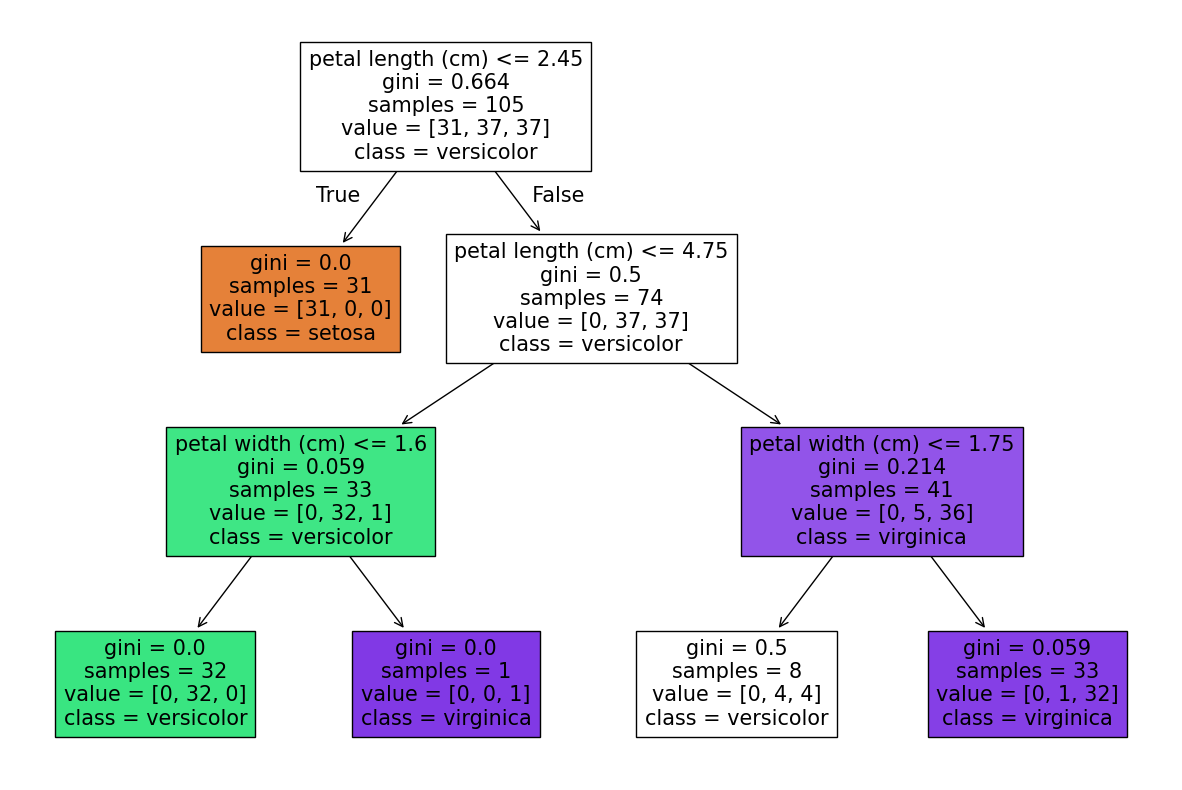

In [95]:
# 1. 导入必要库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 2. 加载数据集（以鸢尾花数据集为例）
iris = load_iris()
X = iris.data  # 特征矩阵（150个样本×4个特征）
y = iris.target  # 目标变量（3类鸢尾花）

# 3. 划分训练集和测试集（70%训练，30%测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

# 4. 创建并训练决策树模型
clf = DecisionTreeClassifier(
    criterion='gini',      # 分裂标准（基尼系数）
    max_depth=3,          # 限制树深度防过拟合
    random_state=42
)
clf.fit(X_train, y_train)

# 5. 模型评估
y_pred = clf.predict(X_test)
print(f"准确率: {accuracy_score(y_test, y_pred):.4f}")
print("\n分类报告:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 6. 可视化决策树（可选）
plt.figure(figsize=(15,10))
plot_tree(
    clf, 
    filled=True, 
    feature_names=iris.feature_names, 
    class_names=iris.target_names
)
plt.show()